In [1]:
from analyser import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
p3_mock = Test("example.csv")
table = p3_mock.mark_table



In [9]:
df_part_norm = p3_mock.add_total_mark().marks(norm=True)
df_normalized = p3_mock.marks(norm=True, to_one=True)


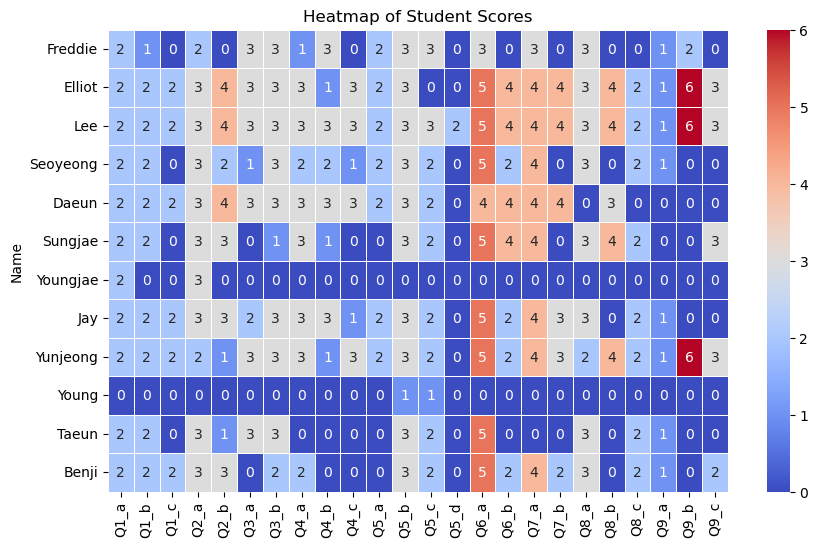

In [3]:
heatmap_data = table.set_index("Name")
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Student Scores")
plt.show()

In [4]:
df_total_marks = p3_mock.get_total_marks()

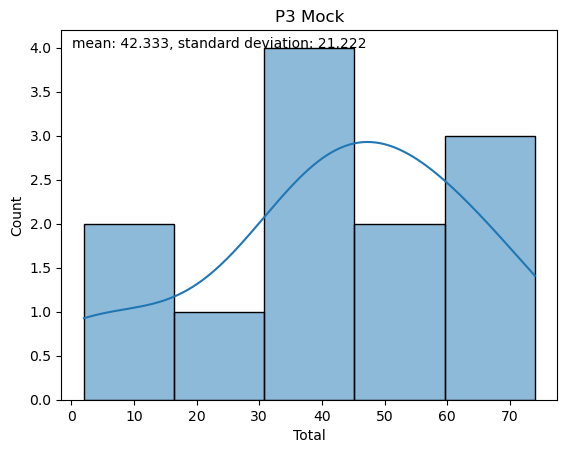

In [8]:
# Plotting the histogram for total marks
hist = sns.histplot(data = df_total_marks,x = 'Total',kde=True)
data = f'mean: %.3f, standard deviation: %.3f'%(np.mean(df_total_marks['Total']),np.std(df_total_marks['Total']))
hist.set_title('P3 Mock')
hist.annotate(data, (0.1,4))
plt.savefig('Output/P3 Mock.png',dpi=300)

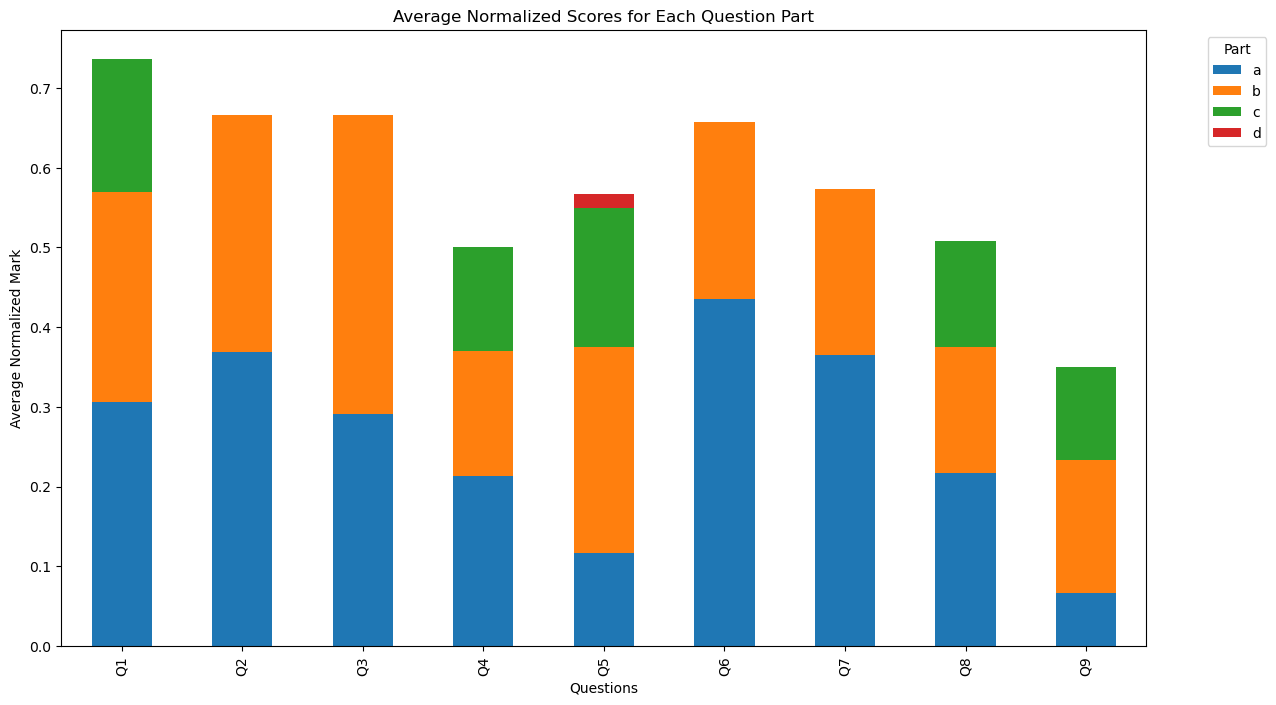

In [11]:
# Calculate the average normalized marks for each part of each question
df_avg = df_normalized.groupby(['Question', 'Part'])['Mark'].mean().unstack().fillna(0)
df_avg = df_avg.drop(['Total'],axis=1)
# Plotting the stacked bar plot
ax = df_avg.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title("Average Normalized Scores for Each Question Part")
plt.ylabel("Average Normalized Mark")
plt.xlabel("Questions")
plt.legend(title='Part', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('Output/P3 Mock per Q.png',dpi=300)
plt.show()